In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import binascii
import numpy as np
from PIL import Image
import pickle
import matplotlib.pyplot as plt

In [3]:
PATH = os.getenv('AGI_DATA_HOME') + '/cifar-100/' # Path to dataset

In [4]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [5]:
# Load the train/test data
train_data = unpickle(PATH + 'src/train')
test_data = unpickle(PATH + 'src/test')
meta_data = unpickle(PATH + 'src/meta')

In [6]:
# Split features/labels
X_train = train_data[b'data']
X_train = X_train.reshape(X_train.shape[0], 3, 32, 32).transpose(0, 2, 3, 1).astype('uint8')
y_train = np.asarray(train_data[b'fine_labels'])

X_test = test_data[b'data']
X_test = X_test.reshape(X_test.shape[0], 3, 32, 32).transpose(0, 2, 3, 1).astype('uint8')
y_test = np.asarray(test_data[b'fine_labels'])

# Get label names from meta data for CIFAR100
fine_label_names = [t.decode('utf8') for t in meta_data[b'fine_label_names']]
coarse_label_names = [t.decode('utf8') for t in meta_data[b'coarse_label_names']]

In [7]:
# Data dimensions
print('X_train: {0}'.format(X_train.shape))
print('y_train: {0}'.format(y_train.shape))
print('X_test: {0}'.format(X_test.shape))
print('y_test: {0}'.format(y_test.shape))

X_train: (50000, 32, 32, 3)
y_train: (50000,)
X_test: (10000, 32, 32, 3)
y_test: (10000,)


Label: cattle (19)


<module 'matplotlib.pyplot' from '/Users/Abdel/Developer/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

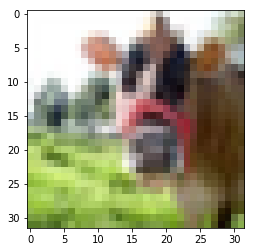

In [8]:
# Show sample image
image_index = 0
image_sample = X_train[image_index, :]
image_label = y_train[image_index]

plt.imshow(image_sample)
print('Label: {0} ({1})'.format(fine_label_names[image_label], image_label))
plt

## Preprocessing

In [9]:
# Path to training/test data
train_path = PATH + 'training/'
test_path = PATH + 'testing/'

train_count = int(X_train.shape[0])
test_count = int(X_test.shape[0])

In [10]:
def preprocess(X, y, num_data, target_path, data_type, num_random=6, display_step=1000):
    # Initialise label count
    label_count = {}
    num_labels = len(np.unique(y))
    for i in range(num_labels):
        label_count[i] = 0
    
    for i in range(num_data):
        label = y[i]
        random = binascii.hexlify(os.urandom(num_random // 2)).decode()

        count = 0
        if label in label_count:
            count = label_count[label]
            count += 1
        label_count[label] = count

        filename = '%s_%s_%i_%i.png' % (data_type, random, label, label_count[label])
        image = Image.fromarray(X_train[i])
#         image = image.convert('LA') # grayscale
        image.save(target_path + filename)

        if i % display_step == 0 or i == 1:
            print('Step #%i: saved %s' % (i, filename))

In [11]:
preprocess(X_train, y_train, 1, train_path, 'train')

Step #0: saved train_ee61ff_19_1.png


In [12]:
preprocess(X_test, y_test, 1, test_path, 'test')

Step #0: saved test_f59390_49_1.png
